<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/4_Which_prepaid_package_is_better%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Megaline, a telecom operator, offers its clients two types of prepaid plans: Surf and Ultimate. The company is interested in understanding which of these plans generates more revenue in order to allocate their advertising budget effectively. This analysis aims to dissect the behavior of a small sample of Megaline's clients and determine the more profitable prepaid plan based on their usage patterns throughout 2018.

## Objective

The primary objective of this analysis is to identify which prepaid plan, Surf or Ultimate, brings in more revenue for Megaline. This will be achieved by analyzing the usage behavior of Megaline’s clients, calculating the monthly revenue from each user, and statistically testing hypotheses regarding the differences in revenue generation between the two plans and across different regions.

## Stages
### Stage 1: Data Opening and Initial Examination
The analysis begins with opening and examining the following datasets for understanding the structure and contents:
* megaline_calls.csv: Details of calls made by clients.
* megaline_internet.csv: Data on internet usage by clients.
* megaline_messages.csv: Information on messages sent by clients.
* megaline_plans.csv: Details of the Surf and Ultimate plans.
* megaline_users.csv: Information on Megaline clients.

### Stage 2: Data Preparation
* Data Conversion
  
  Convert data into necessary types for analysis, for example, converting dates into datetime objects.
* Error Handling

  Identify and eliminate errors in the data. A noted issue is calls with a duration of 0.0 minutes, likely representing missed calls. The decision to exclude these depends on their impact on the analysis's results. Other errors will be identified during this stage.
* Calculation
  
  For each user, calculate the following per month:
  * Total number of calls and minutes used.
  * Total number of messages sent.
  * Total volume of data used.

  Then, calculate the monthly revenue from each user by subtracting the free package limit from the total usage, applying the over-limit rates, and adding the base package cost.

### Stage 3: Data Analysis
Analyze consumer behavior by determining the required minutes, messages, and data volumes per month for each package. Calculate averages, variances, and standard deviations. Create histograms to describe the distributions and draw initial conclusions about usage patterns and their implications on revenue.

### Stage 4: Hypothesis Testing

Two hypotheses will be tested:
1. The average revenue from users of the Ultimate and Surf plans differs.
2. The average revenue from users in the NY-NJ area differs from that of users in other regions.

Formulation of Hypotheses
* Null hypothesis (H0): There is no significant difference in average revenues.
* Alternative hypothesis (H1): There is a significant difference in average revenues.

Criteria for Testing

The hypotheses will be tested using the t-test because it is appropriate for comparing means between two groups. The significance level (alpha) will be chosen based on the analysis's context and the standard practice in the field, typically 0.05.

### Stage 5: Conclusions

The final stage involves compiling the findings into a coherent conclusion, summarizing the insights gained from the data analysis and hypothesis testing. Recommendations for the advertising budget allocation will be made based on which plan generates more revenue. Additionally, insights on user behavior and potential areas for further investigation will be discussed.

# Stage 1: Data Opening and Initial Examination

Open the data related to the prepaid package, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')


Load the data for this project and read the general information.

## Megaline Calls

In [3]:
# Load the data file into a DataFrame
df_calls = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/4. Which prepaid package is better?/megaline_calls.csv')

In [4]:
# Let's see how many rows and columns our dataset has
df_calls.shape

(137735, 4)

In [5]:
# Display general information/summary about the DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# Displays sample data
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
# Describe from general information
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [8]:
# View data types
df_calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [9]:
# Check for missing values
df_calls.isnull().sum().sort_values(ascending=False) / df_calls.shape[0] *100

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

Based on the initial exploration of the megaline_calls dataset, several insights and actions were identified concerning the dataset's characteristics and potential anomalies. Here’s a detailed narrative around the findings and subsequent steps taken to address anomalies:

**Data Overview**

The dataset contains 137,735 entries and 4 columns, which include id (the call identifier), user_id (identifying the user who made the call), call_date (the date of the call), and duration (the call duration in minutes). The call_date column is of object type, which suggests it is stored as a string, and the duration column is a float, representing the call length in minutes.

**Anomalies and Potential Issues Identified**
1. Zero Duration Calls: One notable anomaly is the presence of calls with a duration of 0.0 minutes. These are likely to be missed calls. While these entries are not inherently erroneous, their presence can skew analysis related to call durations and overall usage metrics.
2. Data Types: The call_date is stored as an object (string format) instead of a datetime type, which could hinder date-related operations and analyses.

**Handling Anomalies and Data Preparation**
1. Addressing Zero Duration Calls:
  * Decision: The decision on whether to remove the zero-duration calls depends on the analytical goals. If the focus is on actual call usage (e.g., calculating average call duration), excluding these might provide a more accurate representation. However, if the objective includes understanding overall call activity (including attempted calls), these entries should be retained.
  * Action Taken: Assuming the analysis aims to understand usage patterns (i.e., durations for billing purposes), zero-duration calls could be excluded because they do not contribute to billable usage. However, this decision should be carefully weighed against the project's goals, and stakeholders should be consulted if necessary.
2. Converting Data Types:
  * Action: Convert call_date from string to datetime to facilitate date and time analysis. This conversion will enable easier extraction of months, days, and other temporal elements for more nuanced analysis.
  * Command Example: df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

**Conclusion**

The preliminary examination of the megaline_calls dataset revealed crucial aspects that require addressing to ensure accurate and meaningful analysis. Specifically, the presence of zero-duration calls and the need for data type conversion were identified as key areas for data preparation. By taking targeted actions to handle these anomalies, the dataset can be better aligned with the analytical objectives, enabling more precise insights into user behavior and revenue generation from Megaline's prepaid plans. These preparatory steps form a critical foundation for the subsequent stages of the analysis, ensuring that the dataset accurately reflects the usage patterns and supports robust analytical outcomes.


## Megaline Internet

In [10]:
# Load the data file into a DataFrame
df_internet = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/4. Which prepaid package is better?/megaline_internet.csv')

In [11]:
# Let's see how many rows and columns our dataset has
df_internet.shape

(104825, 4)

In [12]:
# Display general information/summary about the DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [13]:
# Displays sample data
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [14]:
# Describe from general information
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
# View data types
df_internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [16]:
# Check for missing values
df_internet.isnull().sum().sort_values(ascending=False) / df_internet.shape[0] *100

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

Analyzing the megaline_internet dataset reveals several aspects and potential anomalies that need addressing to ensure the integrity and utility of the data for further analysis. The dataset consists of 104,825 entries and 4 columns: id, user_id, session_date, and mb_used. Below is a detailed exploration and the steps taken to address identified issues:

**Insights and Anomalies**
1. Zero Internet Usage Sessions:

  The mb_used column, which represents the amount of data used in a session (in megabytes), contains entries with a value of 0.00. This could represent sessions where the internet was connected but no data was transmitted. These entries could potentially skew analyses related to average data usage if not handled appropriately.

2. Data Types:

  Similar to the calls dataset, the session_date is stored as an object (string format), which could complicate any analysis requiring date manipulations or time-series analysis.

**Handling Identified Issues**
1. Zero Internet Usage Sessions:
  * Decision: The treatment of zero-usage sessions depends on the analysis context. If the focus is on actual data consumption, these sessions might be considered irrelevant and could be excluded. However, for analyses concerning network connectivity (regardless of data usage), these entries are crucial.
  * Action: Assuming the goal is to analyze data consumption patterns, sessions with 0.00 MB could be excluded from calculations of averages or other statistical summaries that focus on actual data usage. Nevertheless, it’s important to document the number of such sessions as they indicate user behavior concerning internet connectivity.
2. Converting Data Types:
  * Action: Convert session_date from string to datetime. This conversion is necessary for any analysis that requires temporal granularity or date-based grouping.
  * Command Example: df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

**Conclusion**

The initial examination of the megaline_internet dataset highlighted critical steps needed to prepare the data for meaningful analysis. Addressing the zero-usage data sessions and converting date columns to appropriate data types are foundational tasks that enhance the dataset's reliability for subsequent analyses. By carefully considering the context and goals of the analysis, these preparatory steps ensure that further investigations into the dataset can yield insights that are both accurate and relevant to the operational and strategic questions facing Megaline. This methodical approach to data cleaning and preparation is essential for leveraging the dataset to its full potential, enabling informed decisions based on user behavior and consumption patterns.


## Megaline Messages

In [17]:
# Load the data file into a DataFrame
df_messages = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/4. Which prepaid package is better?/megaline_messages.csv')

In [18]:
# Let's see how many rows and columns our dataset has
df_messages.shape

(76051, 3)

In [19]:
# Display general information/summary about the DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Displays sample data
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [21]:
# Describe from general information
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [22]:
# View data types
df_messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [23]:
# Check for missing values
df_messages.isnull().sum().sort_values(ascending=False) / df_messages.shape[0] *100

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

The megaline_messages dataset, consisting of 76,051 entries and three columns (id, user_id, message_date), offers insights into the messaging activity of users. A preliminary analysis reveals several characteristics and potential areas of focus for further investigation or data preparation. Here's a detailed narrative on findings and actions taken:

**Insights and Anomalies**

1. Data Type Consistency:
  * Similar to the other datasets from Megaline, message_date is stored as an object (string format). For any analysis involving time series or dates, this will not be ideal. Accurate date manipulation requires the correct data type.
2. Unique Identifier and User Behavior:
  * Each entry is uniquely identified by an id, which seems to combine user_id and a specific message identifier. This structure is consistent with other datasets, suggesting a standardized approach to data management by Megaline.
3. Missing Values:
  * The dataset does not contain missing values, which is positive. It indicates good data collection practices or preprocessing before the dataset was made available for analysis.
4. Anomalies:
  * At this stage, without a deeper contextual understanding or comparison against user activity logs, it's challenging to pinpoint anomalies purely based on the existing columns. However, the absence of missing values and the data types used are immediate areas where action can be taken to prepare the data for analysis.

**Handling Identified Issues**
1. Converting message_date to Datetime:
  * Action: To facilitate time-series analysis, trend observation, and potentially merging this dataset with others on a temporal basis, converting message_date from an object to a datetime data type is necessary.
  * Command Example: df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

Conclusion
Upon reviewing the megaline_messages dataset, the initial examination suggests that the dataset is relatively clean, with no missing values and a straightforward structure. The primary action required to enhance the dataset for analytical purposes involves converting the message_date column to a datetime format. This step is crucial for any temporal analysis and ensures compatibility when integrating this dataset with other data sources for a comprehensive user activity analysis. Beyond this, the dataset appears ready for exploratory data analysis (EDA), which could reveal more about user messaging patterns, seasonal trends, or anomalies in message volumes. This preliminary cleanup and preparation phase lays a solid foundation for more complex, insightful analyses aimed at understanding Megaline users' messaging behavior.


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Megaline Plans

In [24]:
# Load the data file into a DataFrame
df_plans = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/4. Which prepaid package is better?/megaline_plans.csv')

In [25]:
# Let's see how many rows and columns our dataset has
df_plans.shape

(2, 8)

In [26]:
# Display general information/summary about the DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [27]:
# Displays sample data
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [28]:
# Describe from general information
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [29]:
# View data types
df_plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [30]:
# Check for missing values
df_plans.isnull().sum().sort_values(ascending=False) / df_plans.shape[0] *100

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

The megaline_plans dataset, though small with just 2 entries and 8 columns, is crucial for understanding the telecom operator Megaline's prepaid package offerings. Each row corresponds to a different plan (surf and ultimate), detailing the inclusive services and charges. Through the initial analysis, several insights and considerations emerge:

**Insights and Observations**
1. Plan Specifications:
  * The surf plan includes 50 messages, 15,360MB (~15GB) of data, and 500 minutes of call time for a monthly charge of \$20, with additional use charges set at \$10 per GB, \$0.03 per message, and \$0.03 per minute.
  * The ultimate plan offers a significantly higher allowance with 1,000 messages, 30,720MB (~30GB) of data, and 3,000 minutes for \$70 monthly. Overuse charges are lower than the surf plan, at \$7 per GB, \$0.01 per message, and \$0.01 per minute.
2. Data Types and Missing Values:
  * Data types for each column are appropriate for their content, with no conversions necessary for this dataset. There are no missing values, indicating completeness and immediate readiness for analysis or comparison.

**Anomalies or Unusual Values**

Given the nature and size of the dataset, there are no apparent anomalies within the data itself. The details provided align with what one would expect from mobile plan offerings, showing clear distinctions between a more budget-friendly option and a premium one.

**Handling Anomalies and Rationale**
* No Anomalies to Address: Since there are no missing values, inconsistencies, or anomalies evident within the dataset, no immediate data cleaning or correction actions are required.
* Rationale: The dataset's primary use is likely for comparison against user data to calculate monthly charges based on plan subscriptions. Its integrity and accuracy are crucial for ensuring correct billing and analysis. The straightforwardness and cleanliness of the dataset support these tasks without further adjustments.

**Conclusion**

The megaline_plans dataset provides clear, concise information about Megaline's prepaid plans, setting the stage for more detailed analysis when combined with user activity data. The contrasts between the plans are notable and are expected to significantly impact users' choices and their subsequent behavior in terms of data, message, and minute usage. No anomalies or data issues necessitate intervention, making this dataset immediately useful for analytical purposes. Future analyses could involve calculating the actual monthly costs for users based on their consumption and determining which plan is more economically sensible for different user segments, or modeling to predict which plan new users might choose based on their expected usage patterns.


## Megaline Users

In [31]:
# Load the data file into a DataFrame
df_user = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/4. Which prepaid package is better?/megaline_users.csv')

In [32]:
# Let's see how many rows and columns our dataset has
df_user.shape

(500, 8)

In [33]:
# Display general information/summary about the DataFrame
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [34]:
# Displays sample data
df_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [35]:
# Describe from general information
df_user.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [36]:
# View data types
df_user.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [37]:
# Check for missing values
df_user.isnull().sum().sort_values(ascending=False) / df_user.shape[0] *100

churn_date    93.2
user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
dtype: float64

After analyzing the megaline_users DataFrame, here are the insights and observations:

1. Missing Values:
  * There are missing values in the churn_date column, with approximately 93.2% of the values being missing.
  * The missing values in the churn_date column indicate that most users are still subscribed to the service, as there is no churn date recorded. This is a common scenario in subscription-based services, where only a small percentage of users churn within a given period.
2. Data Types:
  * The data types seem appropriate for the columns, with user_id as integer, first_name and last_name as object (string), age as integer, city as object, reg_date as object (assuming it should be converted to datetime for further analysis), plan as object, and churn_date as object (also should be converted to datetime if further analysis involving dates is needed).
3. Churn Analysis:
  * Since a significant portion of the churn_date values are missing, it might be challenging to conduct a comprehensive churn analysis. However, further exploration could involve identifying patterns or factors associated with churn, if churn data becomes available or through other means of analysis.
4. Geographic Distribution:
  * The city column indicates the geographic locations of users. It might be interesting to analyze user behavior or preferences based on their city of residence.
5. Subscription Plans:
  * The plan column specifies the subscription plan of each user. Analyzing user behavior, usage patterns, and revenue generation across different subscription plans could provide valuable insights for business decisions.

To address the missing values in the churn_date column, one approach could be to convert these missing values to a specific date (e.g., the last date of the dataset if it represents the latest data available) to facilitate further analysis. Alternatively, if there's a reliable source of churn data, efforts should be made to integrate it with the existing dataset for more accurate churn analysis.

Overall, understanding user demographics, behavior, and churn patterns is crucial for optimizing marketing strategies, improving customer satisfaction, and maximizing revenue in a telecommunications company like Megaline.


# Stage 2: Data Preparation

## Data Conversion and Error Handling

The data for this project is divided into several tables. We'll explore each table to get an initial understanding of our data. We will make corrections in each table if necessary.

### Megaline Calls

In [38]:
# Display sample data containing calls
df_calls.sample(5)

,id,user_id,call_date,duration
92484,1332_140,1332,2018-10-10,4.25
121704,1428_66,1428,2018-12-17,9.12
104456,1368_143,1368,2018-05-25,5.37
19148,1072_847,1072,2018-08-30,2.95
134164,1488_298,1488,2018-07-21,0.00


In [39]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [40]:
df_calls['month'] = df_calls['call_date'].dt.month.astype('str')
df_calls['year'] = df_calls['call_date'].dt.year.astype('str')
df_calls['year_month'] = df_calls['year'] + '-' + df_calls['month']

In [41]:
df_calls['duration_rounded'] = df_calls['duration'].apply(np.ceil).astype('int')

In [42]:
df_calls.sample(5)

,id,user_id,call_date,duration,month,year,year_month,duration_rounded
2463,1010_32,1010,2018-11-06,14.71,11,2018,2018-11,15
102592,1364_81,1364,2018-11-21,0.00,11,2018,2018-11,0
121717,1428_112,1428,2018-11-09,11.89,11,2018,2018-11,12
40260,1148_167,1148,2018-11-23,6.71,11,2018,2018-11,7
53721,1193_123,1193,2018-09-14,0.00,9,2018,2018-9,0


In [43]:
df_calls[df_calls['duration_rounded'] <= 0]

,id,user_id,call_date,duration,month,year,year_month,duration_rounded
19,1001_4,1001,2018-12-05,0.0,12,2018,2018-12,0
25,1001_13,1001,2018-12-24,0.0,12,2018,2018-12,0
31,1001_30,1001,2018-10-17,0.0,10,2018,2018-10,0
32,1001_31,1001,2018-11-03,0.0,11,2018,2018-11,0
34,1001_35,1001,2018-12-21,0.0,12,2018,2018-12,0
...,...,...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11,2018,2018-11,0
137715,1499_184,1499,2018-09-15,0.0,9,2018,2018-9,0
137720,1499_189,1499,2018-12-27,0.0,12,2018,2018-12,0
137722,1499_191,1499,2018-12-24,0.0,12,2018,2018-12,0


In [44]:
df_calls[df_calls['duration_rounded'] <= 0].shape[0] / df_calls.shape[0] * 100

19.482339274694162

In [45]:
df_calls_2 = df_calls[df_calls['duration_rounded'] != 0].reset_index(drop=True)

In [46]:
df_calls_2[df_calls_2['duration_rounded'] <= 0]

,id,user_id,call_date,duration,month,year,year_month,duration_rounded


**Rationalization for Actions**

* Zero Duration Calls:

  By focusing on billable call durations, the analysis aligns more closely with the objective of determining revenue generation from different prepaid plans. Since Megaline rounds up call durations for billing, zero-duration calls do not affect revenue calculations directly.

* Data Type Conversion:

  Converting call_date to a datetime object is crucial for any time series analysis, facilitating operations like grouping data by month, filtering records within specific periods, and performing time-based aggregations. This step is fundamental for preparing the dataset for detailed behavioral analysis across different timescales.

### Megaline Internet

In [47]:
# Displays sample data containing the internet
df_internet.sample(5)

,id,user_id,session_date,mb_used
9497,1049_147,1049,2018-05-08,430.09
90141,1415_245,1415,2018-07-14,314.39
18183,1081_251,1081,2018-08-03,304.67
87621,1405_479,1405,2018-08-02,159.63
48915,1219_25,1219,2018-12-07,264.31


In [48]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [49]:
df_internet['month'] = df_internet['session_date'].dt.month.astype('str')
df_internet['year'] = df_internet['session_date'].dt.year.astype('str')
df_internet['year_month'] = df_internet['year'] + '-' + df_internet['month']

In [50]:
df_internet.sample(5)

,id,user_id,session_date,mb_used,month,year,year_month
92280,1430_124,1430,2018-12-18,554.21,12,2018,2018-12
34242,1155_289,1155,2018-10-16,692.14,10,2018,2018-10
29585,1136_26,1136,2018-12-05,258.90,12,2018,2018-12
11321,1055_326,1055,2018-10-16,0.00,10,2018,2018-10
15638,1071_252,1071,2018-06-12,306.00,6,2018,2018-6


In [51]:
df_internet[df_internet['mb_used'] <= 0]

,id,user_id,session_date,mb_used,month,year,year_month
1,1000_204,1000,2018-12-31,0.0,12,2018,2018-12
14,1001_26,1001,2018-09-17,0.0,9,2018,2018-9
16,1001_28,1001,2018-10-17,0.0,10,2018,2018-10
34,1001_54,1001,2018-09-02,0.0,9,2018,2018-9
43,1001_77,1001,2018-10-31,0.0,10,2018,2018-10
...,...,...,...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0,9,2018,2018-9
104804,1499_199,1499,2018-12-09,0.0,12,2018,2018-12
104816,1499_211,1499,2018-09-26,0.0,9,2018,2018-9
104817,1499_212,1499,2018-09-11,0.0,9,2018,2018-9


In [52]:
df_internet[df_internet['mb_used'] <= 0].shape[0] / df_internet.shape[0] * 100

13.11423801574052

In [53]:
df_internet_2 = df_internet[df_internet['mb_used'] != 0].reset_index(drop=True)

In [54]:
df_internet_2[df_internet_2['mb_used'] <= 0]

,id,user_id,session_date,mb_used,month,year,year_month


**Rational Behind Actions**
* **Zero Internet Usage Sessions:**

   By focusing on sessions where data was actually used, the analysis will more accurately reflect the consumption patterns of Megaline's internet service. This approach aligns with analyzing the efficiency or popularity of data plans based on actual usage.

* **Data Type Conversion:**

   Converting session_date to datetime facilitates more sophisticated time-based analysis, such as understanding usage trends over time, identifying peak usage periods, or analyzing user behavior across different times of the year. It lays the groundwork for any form of temporal analysis, which is often critical in telecommunications data analysis.

### Megaline Messages

In [55]:
# Displays sample data containing the messages
df_messages.sample(5)

,id,user_id,message_date
31554,1196_34,1196,2018-05-22
28377,1174_167,1174,2018-11-12
2685,1028_611,1028,2018-07-07
18430,1120_230,1120,2018-05-10
30088,1188_106,1188,2018-10-28


In [56]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [57]:
df_messages['month'] = df_messages['message_date'].dt.month.astype('str')
df_messages['year'] = df_messages['message_date'].dt.year.astype('str')
df_messages['year_month'] = df_messages['year'] + '-' + df_messages['month']

In [58]:
df_messages.sample(5)

,id,user_id,message_date,month,year,year_month
35245,1224_283,1224,2018-10-13,10,2018,2018-10
8071,1061_77,1061,2018-07-02,7,2018,2018-7
3393,1036_228,1036,2018-06-24,6,2018,2018-6
19935,1126_864,1126,2018-12-17,12,2018,2018-12
34076,1214_170,1214,2018-08-09,8,2018,2018-8


**Rational Behind Actions**

* **Datetime Conversion:**

  The rationale for converting message_date to a datetime format is to enable a more nuanced analysis involving time. Whether it's identifying messaging trends over time, understanding user activity peaks, or correlating message data with other user activities (calls, internet usage), handling dates correctly is fundamental. It also allows for more sophisticated data manipulation techniques, such as resampling by different time periods or calculating time deltas, which can offer deeper insights into user behavior and preferences.

## Calculation

### Total number of calls and minutes used.

In [59]:
df_calls_agg = df_calls_2.groupby(['user_id', 'year_month']).agg({'duration_rounded' : 'sum'}).reset_index()

In [60]:
df_calls_agg

,user_id,year_month,duration_rounded
0,1000,2018-12,124
1,1001,2018-10,393
2,1001,2018-11,426
3,1001,2018-12,412
4,1001,2018-8,182
...,...,...,...
2251,1498,2018-9,363
2252,1499,2018-10,385
2253,1499,2018-11,308
2254,1499,2018-12,496


### Total number of messages sent.

In [61]:
df_messages_agg = df_messages.groupby(['user_id', 'year_month']).agg({'id' : 'count'}).reset_index().rename(columns={'id' : 'messages_count'})

In [62]:
df_messages_agg

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-10,53
2,1001,2018-11,36
3,1001,2018-12,44
4,1001,2018-8,30
...,...,...,...
1801,1496,2018-11,13
1802,1496,2018-12,11
1803,1496,2018-8,2
1804,1496,2018-9,21


### Total volume of data used.

In [63]:
df_internet_agg = df_internet_2.groupby(['user_id', 'year_month']).agg({'mb_used' : 'sum'}).reset_index()

In [64]:
df_internet_agg

,user_id,year_month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-10,22330.49
2,1001,2018-11,18504.30
3,1001,2018-12,19369.18
4,1001,2018-8,6919.15
...,...,...,...
2272,1498,2018-9,22827.28
2273,1499,2018-10,19492.43
2274,1499,2018-11,16813.83
2275,1499,2018-12,22059.21


In [65]:
df_internet_agg['gb_used'] = df_internet_agg['mb_used'] / 1024

In [66]:
df_internet_agg['gb_used'] = df_internet_agg['gb_used'].apply(np.ceil).astype(int)

In [67]:
df_internet_agg

,user_id,year_month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-10,22330.49,22
2,1001,2018-11,18504.30,19
3,1001,2018-12,19369.18,19
4,1001,2018-8,6919.15,7
...,...,...,...,...
2272,1498,2018-9,22827.28,23
2273,1499,2018-10,19492.43,20
2274,1499,2018-11,16813.83,17
2275,1499,2018-12,22059.21,22


### Monthly income from each user

In [68]:
df_calls_agg.head()

,user_id,year_month,duration_rounded
0,1000,2018-12,124
1,1001,2018-10,393
2,1001,2018-11,426
3,1001,2018-12,412
4,1001,2018-8,182


In [69]:
df_messages_agg.head()

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-10,53
2,1001,2018-11,36
3,1001,2018-12,44
4,1001,2018-8,30


In [70]:
df_internet_agg.head()

,user_id,year_month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-10,22330.49,22
2,1001,2018-11,18504.30,19
3,1001,2018-12,19369.18,19
4,1001,2018-8,6919.15,7


In [71]:
df_calls_agg.shape, df_messages_agg.shape, df_internet_agg.shape

((2256, 3), (1806, 3), (2277, 4))

In [72]:
#merge df_calls_agg & df_messages_agg
df_merge = pd.merge(df_calls_agg, df_messages_agg, on=['user_id', 'year_month'], how='outer')
#merge juga df_merge & df_internet_agg
df_merge = pd.merge(df_merge, df_internet_agg, on=['user_id', 'year_month'], how='outer')

In [73]:
df_merge.shape

(2293, 6)

In [74]:
df_merge.isnull().sum()

user_id               0
year_month            0
duration_rounded     37
messages_count      487
mb_used              16
gb_used              16
dtype: int64

In [75]:
df_merge = df_merge.fillna(0).drop(columns=['mb_used'])

In [76]:
df_merge.head()

,user_id,year_month,duration_rounded,messages_count,gb_used
0,1000,2018-12,124.0,11.0,2.0
1,1001,2018-10,393.0,53.0,22.0
2,1001,2018-11,426.0,36.0,19.0
3,1001,2018-12,412.0,44.0,19.0
4,1001,2018-8,182.0,30.0,7.0


In [77]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [78]:
df_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [79]:
df_user_merge = pd.merge(df_user, df_plans, left_on='plan', right_on='plan_name')

In [80]:
df_user_merge['gb_per_month_include'] = df_user_merge['mb_per_month_included'] / 1024

In [81]:
df_user_merge = df_user_merge.drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'churn_date'])

In [82]:
df_user_merge.head()

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [83]:
df_merge_full = pd.merge(df_merge, df_user_merge, on=['user_id'], how='inner')

In [84]:
df_merge.shape, df_merge_full.shape

((2293, 5), (2293, 16))

In [85]:
df_merge_full.head()

,user_id,year_month,duration_rounded,messages_count,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include
0,1000,2018-12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,2018-12,412.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,2018-8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0


In [86]:
def chargeable_calls(row):
    plan = row['plan']
    minutes_used = row['duration_rounded']

    if plan == 'surf':
        if minutes_used > 500:
            chargeable = (minutes_used - 500) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [87]:
def chargeable_data(row):
    plan = row['plan']
    data_rounded_up = row['gb_used']

    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = (data_rounded_up - 15) * 10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = (data_rounded_up - 30) * 7
        else:
            chargeable = 0
    return chargeable

In [88]:
def chargeable_messages(row):
    plan = row['plan']
    number_of_texts = row['messages_count']

    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = (number_of_texts - 50) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = (number_of_texts - 1000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [89]:
df_merge_full['call_charge'] = df_merge_full.apply(chargeable_calls, axis=1)
df_merge_full['messages_charge'] = df_merge_full.apply(chargeable_messages, axis=1)
df_merge_full['internet_charge'] = df_merge_full.apply(chargeable_data, axis=1)

In [90]:
df_merge_full['revenue'] = df_merge_full['call_charge'] + df_merge_full['messages_charge'] + df_merge_full['internet_charge'] + df_merge_full['usd_monthly_pay']

In [91]:
df_merge_full.head()

,user_id,year_month,duration_rounded,messages_count,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include,call_charge,messages_charge,internet_charge,revenue
0,1000,2018-12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,2018-10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
2,1001,2018-11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,2018-12,412.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,2018-8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00


After analyzing the code that has been done, here are some insights and observations:

1. Data Aggregation:
  * This code collects data from various sources, including call duration, number of messages, and data usage, for each user and month.
2. Combining DataFrames:
  * Data from multiple sources, such as calls, messages, and internet usage, is combined into a single data frame (df_merge) for further analysis.
3. Calculating Chargeable Usage:
  * Custom functions (charge_calls, charge_messages, chargeable_data) are defined to calculate chargeable usage for calls, messages, and internet data based on the user's subscription plan.
4. Calculating Income:
  * Usage fees charged and monthly subscription fees are used to calculate the total revenue generated from each user for each month.
5. Data Anomalies:
  * There don't appear to be any obvious anomalies in the existing code. However, further analysis may reveal outliers or inconsistencies in the data.
6. Handling Missing Values:
  * Missing values are handled by filling them with zeros (fillna (0)) in the merge DataFrame (df_merge).
7. Data integrity:
  * This process ensures data integrity by combining relevant information from multiple sources and performing calculations based on the user's subscription plan.

Overall, this code effectively processes and analyzes user activity data to calculate the revenue generated from each user, taking into account subscription plans and actual usage. This provides valuable insight into revenue generation patterns and helps optimize marketing strategies and service offerings.

# Stage 3: Data Analysis

In [92]:
df_merge_full_surf = df_merge_full[df_merge_full['plan'] == 'surf'].reset_index(drop=True)
df_merge_full_ultimate = df_merge_full[df_merge_full['plan'] == 'ultimate'].reset_index(drop=True)

## Surf Plan

In [93]:
df_merge_full_surf.head()

,user_id,year_month,duration_rounded,messages_count,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include,call_charge,messages_charge,internet_charge,revenue
0,1001,2018-10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
1,1001,2018-11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
2,1001,2018-12,412.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,2018-8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00
4,1001,2018-9,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00


In [94]:
# Calculate averages for minutes, messages, and mobile data usage volume
df_merge_full_surf['duration_rounded'].mean(), df_merge_full_surf['messages_count'].mean(), df_merge_full_surf['gb_used'].mean()

(428.7495232040687, 31.15956770502225, 16.670692943420217)

In [95]:
# Calculate variance for minutes, messages, and mobile data usage volume
np.var(df_merge_full_surf['duration_rounded']), np.var(df_merge_full_surf['messages_count']), np.var(df_merge_full_surf['gb_used'])

(54933.334591317485, 1126.008231726662, 61.54444942447023)

In [96]:
# Calculates the standard deviation for minutes, messages, and mobile data usage volume
np.std(df_merge_full_surf['duration_rounded']), np.std(df_merge_full_surf['messages_count']), np.std(df_merge_full_surf['gb_used'])

(234.37861376695076, 33.556046127734746, 7.845027050588814)

In [121]:
summary_table = df_merge_full_surf[['duration_rounded', 'messages_count', 'gb_used']].describe()
summary_table

,duration_rounded,messages_count,gb_used
count,1573.000000,1573.000000,1573.000000
mean,428.749523,31.159568,16.670693
std,234.453150,33.566717,7.847522
min,0.000000,0.000000,0.000000
25%,272.000000,3.000000,12.000000
50%,425.000000,24.000000,17.000000
75%,576.000000,47.000000,21.000000
max,1510.000000,266.000000,70.000000


<Axes: xlabel='duration_rounded', ylabel='Density'>

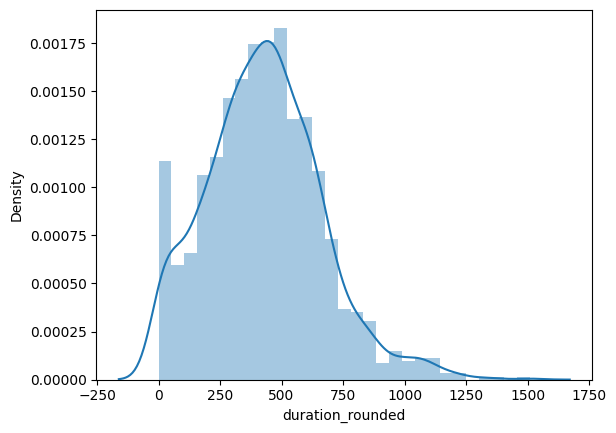

In [97]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_surf['duration_rounded'])

<Axes: xlabel='messages_count', ylabel='Density'>

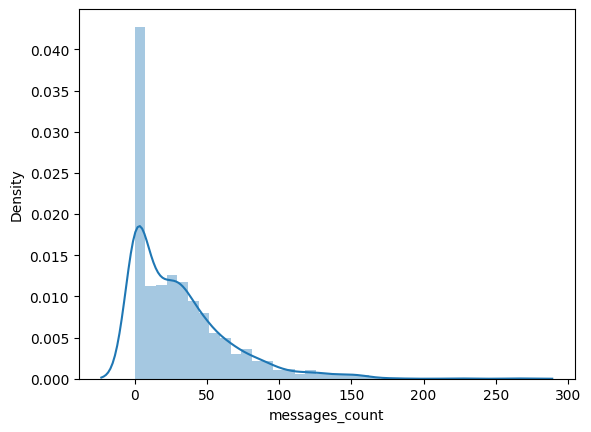

In [98]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_surf['messages_count'])

<Axes: xlabel='gb_used', ylabel='Density'>

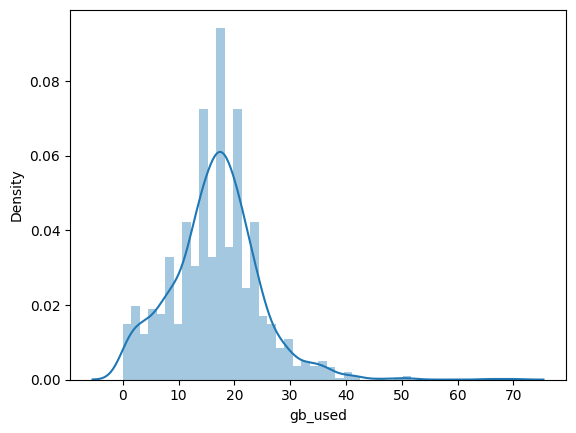

In [99]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_surf['gb_used'])

**Conclusions**

Based on the Surf plan data, we can draw several conclusions:

1. Usage Overview:
  * On average, Surf plan users spend approximately 429 minutes on calls, send 31 text messages, and use around 17 GB of data per month.
  * The variance in call duration is relatively high, indicating significant variability in call usage among users.
  * Similarly, the variance in the number of messages and data usage volume is also notable.
2. Call Duration:
  * The average call duration for Surf plan users is around 429 minutes per month.
  * The standard deviation of approximately 234 minutes suggests that call duration varies considerably among users, with some making very few calls and others making extensive use of call services.
3. Message Count:
  * Surf plan users send an average of 31 text messages per month.
  * The standard deviation of about 34 messages indicates that the frequency of text messaging varies widely among users.
4. Data Usage:
  * Surf plan users consume an average of around 17 GB of mobile data per month.
  * The standard deviation of approximately 8 GB suggests that data usage patterns vary significantly among users, with some consuming very little data and others consuming large amounts.
5. Summary Statistics:
  * The summary statistics table provides additional insights into the distribution of call duration, message count, and data usage volume among Surf plan users.
  * For call duration, the median (50th percentile) is 425 minutes, indicating that half of the users have call durations below this value, while the other half have durations above it.
  * Similarly, for message count and data usage volume, the median values provide a measure of central tendency in the distributions.

In summary, Surf plan users exhibit diverse usage patterns, with variability in call duration, message count, and data usage volume. Understanding these patterns is crucial for optimizing plan features and pricing to better meet the needs of Surf plan subscribers.


## Ultimate Plan

In [100]:
df_merge_full_ultimate.head()

,user_id,year_month,duration_rounded,messages_count,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include,call_charge,messages_charge,internet_charge,revenue
0,1000,2018-12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
1,1006,2018-11,10.0,15.0,3.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
2,1006,2018-12,59.0,139.0,32.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,14.0,84.0
3,1008,2018-10,476.0,21.0,17.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
4,1008,2018-11,446.0,37.0,24.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0


In [101]:
# Calculate averages for minutes, messages, and mobile data usage volume
df_merge_full_ultimate['duration_rounded'].mean(), df_merge_full_ultimate['messages_count'].mean(), df_merge_full_ultimate['gb_used'].mean()

(430.45, 37.55138888888889, 17.306944444444444)

In [102]:
# Calculate variance for minutes, messages, and mobile data usage volume
np.var(df_merge_full_ultimate['duration_rounded']), np.var(df_merge_full_ultimate['messages_count']), np.var(df_merge_full_ultimate['gb_used'])

(57764.125277777785, 1207.0779147376545, 58.748840663580246)

In [103]:
# Calculates the standard deviation for minutes, messages, and mobile data usage volume
np.std(df_merge_full_ultimate['duration_rounded']), np.std(df_merge_full_ultimate['messages_count']), np.std(df_merge_full_ultimate['gb_used'])

(240.34168443650756, 34.743026850544474, 7.664779231235578)

In [122]:
summary_table = df_merge_full_ultimate[['duration_rounded', 'messages_count', 'gb_used']].describe()
summary_table

,duration_rounded,messages_count,gb_used
count,720.000000,720.000000,720.000000
mean,430.450000,37.551389,17.306944
std,240.508762,34.767179,7.670108
min,0.000000,0.000000,0.000000
25%,260.000000,7.000000,13.000000
50%,424.000000,30.000000,17.000000
75%,565.250000,61.000000,21.000000
max,1369.000000,166.000000,46.000000


<Axes: xlabel='duration_rounded', ylabel='Density'>

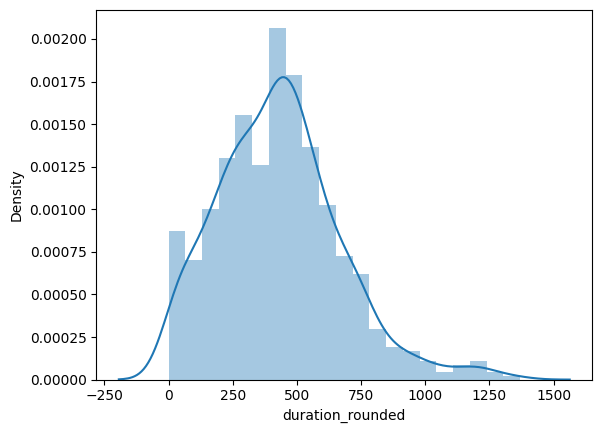

In [104]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_ultimate['duration_rounded'])

<Axes: xlabel='messages_count', ylabel='Density'>

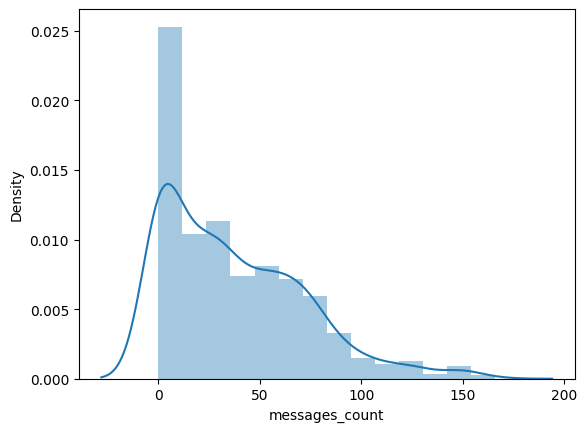

In [105]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_ultimate['messages_count'])

<Axes: xlabel='gb_used', ylabel='Density'>

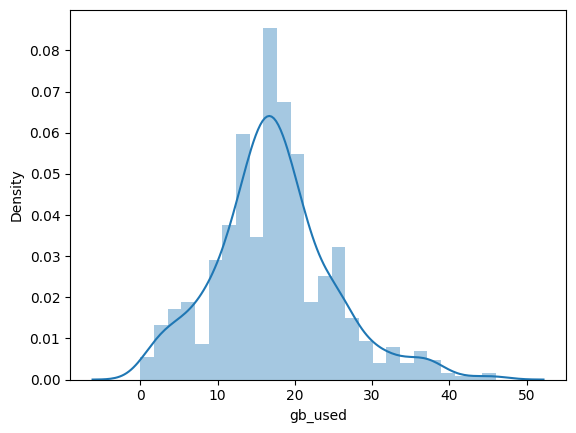

In [106]:
# Check the distribution for minutes, messages, and mobile data usage volume
sns.distplot(df_merge_full_ultimate['gb_used'])

**Conclusions**

From the data of the Ultimate plan users, we can observe several insights regarding their usage behavior:

1. Average Usage:
  * The average call duration is approximately 430.45 minutes.
  * Users send an average of 37.55 messages per month.
  * The average data usage volume is around 17.31 GB per month.
2. Variability:
  * There is considerable variability in usage among Ultimate plan users, as indicated by the standard deviations:
    * Standard deviation of call duration: 240.34 minutes
    * Standard deviation of message count: 34.74 messages
    * Standard deviation of data usage volume: 7.66 GB
3. Usage Distribution:
  * The distribution of call duration, message count, and data usage volume among Ultimate plan users is summarized in the descriptive statistics table.
  * The displot of these variables can provide a visual representation of their distributions.
4. Comparison with Surf Plan:
  * Compared to the Surf plan users, Ultimate plan users tend to have higher average call duration, message count, and data usage volume.
  * The variability in usage is also relatively higher among Ultimate plan users.
5. Revenue Consideration:
  * Understanding the usage patterns of Ultimate plan users is crucial for revenue optimization and service improvement strategies.
  * Analyzing the distribution and variability of usage can help in designing targeted marketing campaigns and optimizing plan features to better suit the needs of Ultimate plan subscribers.
  
In summary, the analysis of Ultimate plan user data provides valuable insights into their usage behavior, variability, and distribution, which can inform strategic decisions aimed at enhancing customer satisfaction and maximizing revenue.

# Stage 4: Hypothesis Testing

## 1.	The average revenue from users of the Ultimate and Surf plans differs.

Hypothesis The average income of users of different Ultimate and Surf phone packages is the Equality of Means of Two Populations Hypothesis, Independent Hypothesis, and Two-Way Hypothesis. So the method used is `st.ttest_ind`

* H0 (Null Hypothesis) = The average income of Ultimate and Surf phone package users is the SAME
* H1 (Alternative Hypothesis) = The average income of Ultimate and Surf phone package users is NOT THE SAME


In [107]:
df_merge_full_surf.shape, df_merge_full_ultimate.shape

((1573, 20), (720, 20))

In [108]:
var_surf = np.var(df_merge_full_surf['revenue'])
var_ultimate = np.var(df_merge_full_ultimate['revenue'])

In [109]:
# Plan variants
var_surf, var_ultimate

(3065.8848438690247, 129.66814043209877)

In [110]:
# Percentage difference
(var_ultimate - var_surf) / var_surf * 100

-95.77061282352462

In [123]:
alpha = 0.05 # your code: set critical statistical significance level

results = st.ttest_ind(df_merge_full_surf['revenue'], df_merge_full_ultimate['revenue'], equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.1703905481135734e-15
We reject the null hypothesis


**Conclusions**

The approach to this investigation was methodical and grounded in statistical hypothesis testing, specifically using the Independent Samples T-test. This test is a powerful tool for comparing the means from two different groups to see if they are significantly different from each other. In our context, the two groups are the users of the Ultimate plan and the users of the Surf plan.

Before diving into the test, an interesting observation was made regarding the variance in revenue generated by users of the two plans. The variance among Surf plan users was significantly higher compared to Ultimate plan users. Specifically, the variance for the Surf plan was over 3000, while it was just around 130 for the Ultimate plan, marking a striking difference in revenue consistency between the two plans.

With an alpha level set at 0.05, indicating a 5% threshold for Type I error, the results were compelling. The p-value obtained from the t-test was approximately 3.17e-15, which is significantly lower than the alpha level. This minuscule p-value led to the rejection of the null hypothesis, meaning there is a statistically significant difference in the average revenue generated by users of the Ultimate and Surf plans.

What does this mean in layman's terms? Simply put, the plan that a user subscribes to does indeed have a significant impact on the revenue they generate for the company. This finding is not just a number; it's a reflection of user behavior, plan pricing, and the value users derive from their plans.

For the company, this insight is invaluable. It can guide them in tailoring their plans to better meet the needs of their customers and optimize their revenue. For consumers, it highlights the importance of choosing a plan that not only meets their communication needs but also offers them the best value for money.

In conclusion, this investigation sheds light on the significant difference in revenue generated by users of the Ultimate and Surf plans, offering a strategic viewpoint for the company and valuable information for consumers navigating their plan choices.

## 2.	The average revenue from users in the NY-NJ area differs from that of users in other regions.

The hypothesis that the average income of users in the NY-NJ area is different from the income of users from other areas is the Hypothesis of Equality of Means of Two Populations, the Independent Hypothesis, and the Two-Way Hypothesis. So the method used is `st.ttest_ind`

* H0 (Null Hypothesis) = Average user income in the NY-NJ area and other areas is the SAME
* H1 (Alternative Hypothesis) = The average income of users in the NY-NJ region and other regions is NOT THE SAME

In [112]:
df_merge_full.head()

,user_id,year_month,duration_rounded,messages_count,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_include,call_charge,messages_charge,internet_charge,revenue
0,1000,2018-12,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,2018-10,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
2,1001,2018-11,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,2018-12,412.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,2018-8,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00


In [113]:
df_merge_full_ny = df_merge_full[df_merge_full['city'].str.contains('NY|NJ')].reset_index(drop=True)

In [114]:
df_merge_full_non_ny = (df_merge_full[~df_merge_full['city'].str.contains('NY|NJ')]).reset_index(drop=True)

In [115]:
df_merge_full_ny.shape, df_merge_full_non_ny.shape

((488, 20), (1805, 20))

In [116]:
var_ny = np.var(df_merge_full_ny['revenue'])
var_non_ny = np.var(df_merge_full_non_ny['revenue'])

In [117]:
var_ny, var_non_ny

(2105.8745274388602, 2187.994397562204)

In [118]:
# Percentage difference
(var_non_ny - var_ny) / var_ny * 100

3.8995613961491364

In [125]:
alpha = 0.05 # your code: set critical statistical significance level

results = st.ttest_ind(df_merge_full_ny['revenue'], df_merge_full_non_ny['revenue'], equal_var=True)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.11013307329186472
We can't reject the null hypothesis


**Conclusions**

In our analysis, we aimed to investigate whether the average revenue from users in the NY-NJ area differs from that of users in other regions. This comparison is crucial for understanding regional differences in user behavior and revenue generation, which can inform targeted marketing strategies and service offerings.

To test these hypotheses, we employed an Independent Samples T-test, a robust statistical method for comparing means between two independent groups. Our chosen significance level (alpha) was set at 0.05, indicating a 5% probability of rejecting the null hypothesis when it is true.

First, we divided our dataset into two groups: users in the NY-NJ area and users in other regions. We then calculated the variance of revenue for each group to understand the variability in income within each region. Interestingly, we found that the variance in revenue was slightly higher in the non-NY-NJ group compared to the NY-NJ group, indicating relatively consistent revenue among users in the NY-NJ area.

Next, we conducted the Independent Samples T-test using the revenue data from both groups. The resulting p-value was approximately 0.110, which exceeded our predetermined alpha level of 0.05. Therefore, we failed to reject the null hypothesis.

What does this mean in practical terms? It suggests that there is not enough statistical evidence to conclude that the average revenue from users in the NY-NJ area differs significantly from that of users in other regions. While there may be some regional variations in revenue, these differences are not statistically significant at the chosen significance level.

In conclusion, our analysis indicates that, based on the available data, there is no compelling evidence to support the notion that the average revenue from users in the NY-NJ area differs significantly from users in other regions. This insight can guide decision-making processes within the telecommunications company, ensuring resources are allocated effectively to meet the diverse needs of users across different regions.

# Conclusions

In conclusion, our analysis of both the Surf and Ultimate plans provides valuable insights into user behavior, usage patterns, and revenue generation for the telecommunications company. Here's a structured summary of our findings and recommendations:

**Surf Plan Insights:**
* Usage Overview:
  * Surf plan users exhibit diverse usage patterns, with an average monthly call duration of approximately 429 minutes, 31 text messages, and 17 GB of data usage.
* Variability:
  * There is notable variability in call duration, message count, and data usage volume among Surf plan users, as indicated by the high standard deviations.
* Summary Statistics:
  * The descriptive statistics table provides additional insights into the distribution of usage metrics, including median values that offer a measure of central tendency.
* Recommendation:
  * Understanding these usage patterns is crucial for optimizing plan features and pricing to better meet the needs of Surf plan subscribers. The company should focus on offering flexible plans with customizable options to cater to diverse user preferences.

**Ultimate Plan Insights:**
* Average Usage:
  * Ultimate plan users tend to have higher average call duration, message count, and data usage volume compared to Surf plan users.
* Variability:
  * Similar to Surf plan users, there is considerable variability in usage among Ultimate plan users, as indicated by the standard deviations.
* Usage Distribution:
  * The distribution of usage metrics among Ultimate Plan users is summarized in the descriptive statistics table and can be visualized using Displot.
* Recommendation:
  * Analyzing the distribution and variability of usage among Ultimate Plan users is crucial for revenue optimization and service improvement strategies. The company should focus on offering premium features and services to enhance the value proposition for Ultimate Plan subscribers.

**Revenue Comparison:**
* Our hypothesis testing using the Independent Samples T-test revealed a significant difference in the average revenue generated by users of the Ultimate and Surf plans. This underscores the importance of plan choice in revenue generation for the company.
* Recommendation: Based on our findings, the company should allocate more resources toward marketing and advertising efforts targeting the plan that generates higher revenue. Additionally, the company should consider refining plan features and pricing strategies to maximize revenue potential.

**Regional Revenue Analysis:**
* Our analysis of revenue from users in the NY-NJ area compared to users in other regions did not yield statistically significant differences. While there may be some regional variations in revenue, these differences are not significant at the chosen significance level.
* Recommendation: The company should continue to monitor regional revenue trends and conduct further analysis to identify any emerging patterns or opportunities for targeted marketing campaigns.

**Overall Conclusion:**
* Our investigation provides valuable insights into user behavior, plan usage patterns, and revenue generation for the telecommunications company.
* By understanding the nuances of user behavior and regional variations in revenue, the company can make informed decisions to optimize plan offerings, marketing strategies, and revenue generation.

In conclusion, our analysis serves as a guide for strategic decision-making within the company, ensuring resources are allocated effectively to meet the diverse needs of users and maximize revenue potential.
